In [22]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import time
import numpy as np
import tensorflow as tf
import tensorlayer as tl
from tensorlayer.models.imagenet_classes import class_names
import cv2
import matplotlib.pyplot as plt
tf.logging.set_verbosity(tf.logging.DEBUG)
tl.logging.set_verbosity(tl.logging.DEBUG)


#### Using opencv load image


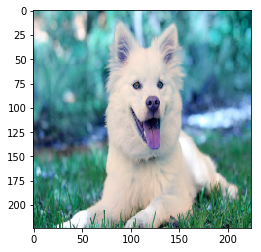

In [23]:
img = cv2.imread('../images/dog.jpeg', 3)
img = cv2.resize(img, (224, 224))  # Resize the iamge to [224,244,3]
plt.imshow(img)

#### We have a 3 channel image with size 224x224

In [24]:
img.shape

(224, 224, 3)

### Building Tensorflow Computation Graph
The placehold has shape as (number of samples, height, width, number of channels).
We use (None, 224, 224, 3) is because we are using a pre-trained VGG16 model.

In [25]:
tf.reset_default_graph() # Reset computation graph
x = tf.placeholder(dtype=tf.float32, shape=[None, 224, 224, 3],name="image_input") # Placeholder with shape [None, 224, 224, 3]

Using tensorlayer to build pre-defined VGG16 computation graph
![vgg16](../images/vgg16.png)

In [26]:
vgg = tl.models.VGG16(x)

[TL] InputLayer  vgg16/input: (?, 224, 224, 3)
[TL] Conv2d vgg16/conv1_1: n_filter: 64 filter_size: (3, 3) strides: (1, 1) pad: SAME act: relu
[TL] Conv2d vgg16/conv1_2: n_filter: 64 filter_size: (3, 3) strides: (1, 1) pad: SAME act: relu
[TL] MaxPool2d vgg16/pool1: filter_size: (2, 2) strides: (2, 2) padding: SAME
[TL] Conv2d vgg16/conv2_1: n_filter: 128 filter_size: (3, 3) strides: (1, 1) pad: SAME act: relu
[TL] Conv2d vgg16/conv2_2: n_filter: 128 filter_size: (3, 3) strides: (1, 1) pad: SAME act: relu
[TL] MaxPool2d vgg16/pool2: filter_size: (2, 2) strides: (2, 2) padding: SAME
[TL] Conv2d vgg16/conv3_1: n_filter: 256 filter_size: (3, 3) strides: (1, 1) pad: SAME act: relu
[TL] Conv2d vgg16/conv3_2: n_filter: 256 filter_size: (3, 3) strides: (1, 1) pad: SAME act: relu
[TL] Conv2d vgg16/conv3_3: n_filter: 256 filter_size: (3, 3) strides: (1, 1) pad: SAME act: relu
[TL] MaxPool2d vgg16/pool3: filter_size: (2, 2) strides: (2, 2) padding: SAME
[TL] Conv2d vgg16/conv4_1: n_filter: 512 f

#### Intialize the Session

In [27]:
sess = tf.InteractiveSession()

#### Restore pre-trained VGG parameters

In [28]:
vgg.restore_params(sess)

[TL] Restore pre-trained parameters
[TL]   Loading params (3, 3, 3, 64)
[TL]   Loading params (64,)
[TL]   Loading params (3, 3, 64, 64)
[TL]   Loading params (64,)
[TL]   Loading params (3, 3, 64, 128)
[TL]   Loading params (128,)
[TL]   Loading params (3, 3, 128, 128)
[TL]   Loading params (128,)
[TL]   Loading params (3, 3, 128, 256)
[TL]   Loading params (256,)
[TL]   Loading params (3, 3, 256, 256)
[TL]   Loading params (256,)
[TL]   Loading params (3, 3, 256, 256)
[TL]   Loading params (256,)
[TL]   Loading params (3, 3, 256, 512)
[TL]   Loading params (512,)
[TL]   Loading params (3, 3, 512, 512)
[TL]   Loading params (512,)
[TL]   Loading params (3, 3, 512, 512)
[TL]   Loading params (512,)
[TL]   Loading params (3, 3, 512, 512)
[TL]   Loading params (512,)
[TL]   Loading params (3, 3, 512, 512)
[TL]   Loading params (512,)
[TL]   Loading params (3, 3, 512, 512)
[TL]   Loading params (512,)
[TL]   Loading params (25088, 4096)
[TL]   Loading params (4096,)
[TL]   Loading params 

#### Softmax layer for outputing probabiliy distribution 
![softmax](../images/softmax.png)

In [29]:
probs = tf.nn.softmax(vgg.outputs)

#### Tnesorlayer API for printing the network structure

In [30]:
vgg.print_params(False)

[TL]   param   0: vgg16/conv1_1/kernel:0 (3, 3, 3, 64)      float32_ref
[TL]   param   1: vgg16/conv1_1/bias:0 (64,)              float32_ref
[TL]   param   2: vgg16/conv1_2/kernel:0 (3, 3, 64, 64)     float32_ref
[TL]   param   3: vgg16/conv1_2/bias:0 (64,)              float32_ref
[TL]   param   4: vgg16/conv2_1/kernel:0 (3, 3, 64, 128)    float32_ref
[TL]   param   5: vgg16/conv2_1/bias:0 (128,)             float32_ref
[TL]   param   6: vgg16/conv2_2/kernel:0 (3, 3, 128, 128)    float32_ref
[TL]   param   7: vgg16/conv2_2/bias:0 (128,)             float32_ref
[TL]   param   8: vgg16/conv3_1/kernel:0 (3, 3, 128, 256)    float32_ref
[TL]   param   9: vgg16/conv3_1/bias:0 (256,)             float32_ref
[TL]   param  10: vgg16/conv3_2/kernel:0 (3, 3, 256, 256)    float32_ref
[TL]   param  11: vgg16/conv3_2/bias:0 (256,)             float32_ref
[TL]   param  12: vgg16/conv3_3/kernel:0 (3, 3, 256, 256)    float32_ref
[TL]   param  13: vgg16/conv3_3/bias:0 (256,)             float32_ref
[T

In [31]:
vgg.print_layers()

[TL]   layer   0: image_input:0        (?, 224, 224, 3)    float32
[TL]   layer   1: vgg16/conv1_1/Relu:0 (?, 224, 224, 64)    float32
[TL]   layer   2: vgg16/conv1_2/Relu:0 (?, 224, 224, 64)    float32
[TL]   layer   3: vgg16/pool1/MaxPool:0 (?, 112, 112, 64)    float32
[TL]   layer   4: vgg16/conv2_1/Relu:0 (?, 112, 112, 128)    float32
[TL]   layer   5: vgg16/conv2_2/Relu:0 (?, 112, 112, 128)    float32
[TL]   layer   6: vgg16/pool2/MaxPool:0 (?, 56, 56, 128)    float32
[TL]   layer   7: vgg16/conv3_1/Relu:0 (?, 56, 56, 256)    float32
[TL]   layer   8: vgg16/conv3_2/Relu:0 (?, 56, 56, 256)    float32
[TL]   layer   9: vgg16/conv3_3/Relu:0 (?, 56, 56, 256)    float32
[TL]   layer  10: vgg16/pool3/MaxPool:0 (?, 28, 28, 256)    float32
[TL]   layer  11: vgg16/conv4_1/Relu:0 (?, 28, 28, 512)    float32
[TL]   layer  12: vgg16/conv4_2/Relu:0 (?, 28, 28, 512)    float32
[TL]   layer  13: vgg16/conv4_3/Relu:0 (?, 28, 28, 512)    float32
[TL]   layer  14: vgg16/pool4/MaxPool:0 (?, 14, 14, 

#### Session run inference

In [34]:
img = np.expand_dims(img,0) #[224,224,3] -> [1,224,224,3]
img.shape

(1, 224, 224, 3)

In [35]:
prob = sess.run(probs, feed_dict={x: img})
prob.shape

(1, 1000)

In [38]:
prob = prob[0]

In [42]:
p = np.argsort(prob)[0:5]
for p in preds:
    print(class_names[p], prob[p])

Samoyed, Samoyede 0.16822036
Eskimo dog, husky 0.16267341
golden retriever 0.1160161
collie 0.083168924
white wolf, Arctic wolf, Canis lupus tundrarum 0.07951109
